In [1]:
library(reticulate)
use_condaenv(condaenv="pyr2", conda="/data8t_0/hms/anaconda3/bin/conda")
# umap<-import('umap')

In [2]:
library(Seurat)
library(data.table)
library(ggplot2)
library(flexclust)
datasetName = "Jejunum_Jejunum_HCLAdultJejunum2"
#datasetName value: organ_tissue_authorYear without space
dataFormat = 'tsv'
#dataFormat value: tsv (tab separated), 10X (sparse)

setwd("/stor/public/hcad/Jejunum_Jejunum_HCLAdultJejunum2/")

Loading required package: grid

Loading required package: lattice

Loading required package: modeltools

Loading required package: stats4



In [3]:
# Load the organized dataset
if(dataFormat == 'tsv'){
    data.matrix <- read.table(paste0(datasetName,"_expression.tsv"),h = T,sep='\t',row.names = 1)
} else{
   system(paste0("tar -zxvf ", datasetName, "_expression.tsv.gz")) #Invoke the unix command
   data.matrix <- Read10X(data.dir = paste0(datasetName,"_expression"))
   # data.dir: Directory containing the matrix.mtx, genes.tsv (or features.tsv), and barcodes.tsv files provided by 10X.
}
# Load the metadata and annotation
data.metadata <- read.table(file = paste0(datasetName,"_metadata.tsv"), h = T, sep = "\t", row.names = 5)
data.annotation <- read.table(file = paste0(datasetName,"_annotation.tsv"), h = T, sep = "\t", row.names = 1)
if (file.exists(paste0(datasetName,"_annotation2.tsv"))) {
    data.annotation2 <- read.table(file = paste0(datasetName,"_annotation2.tsv"), h = T, sep = "\t", row.names = 1)
}

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


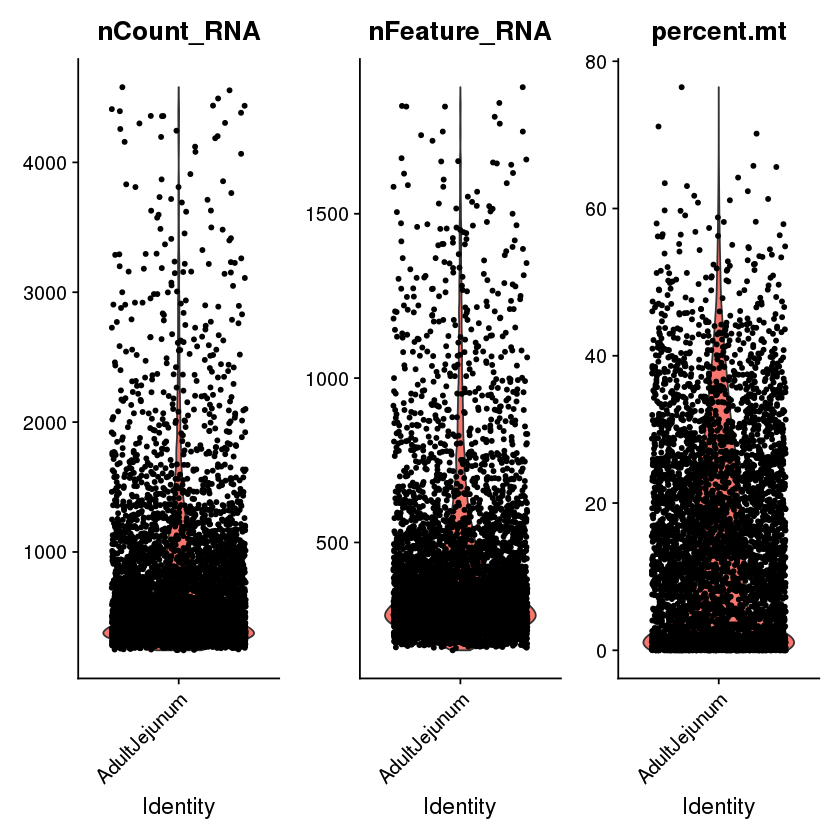

In [4]:
# Pre-processing
min.cells = 50
min.features = 200
nFeature_RNA_range = c(min.features, 600)
percent.mt.thre = 1
# Modify the default value of these parameters according to original paper
dataobj <- CreateSeuratObject(counts = data.matrix, project = datasetName, min.cells = min.cells, min.features = min.features, meta.data = data.metadata)
dataobj <- AddMetaData(dataobj, metadata = data.annotation)

if (file.exists(paste0(datasetName,"_annotation2.tsv"))) {
    dataobj <- AddMetaData(dataobj, metadata = data.annotation2)
}

# QC
dataobj[["percent.mt"]] <- PercentageFeatureSet(dataobj, pattern = "^[Mm][Tt]")
VlnPlot(object = dataobj, features= c("nCount_RNA","nFeature_RNA","percent.mt"))

In [5]:
percent.mt.thre = 40
dataobj <- subset(dataobj, subset = nFeature_RNA > nFeature_RNA_range[1] & nFeature_RNA < nFeature_RNA_range[2] & percent.mt < percent.mt.thre)

In [6]:
warnings('off')
# Normalization
# Two approaches
# 1. run standard log normalization 
dataobj <- NormalizeData(dataobj, normalization.method = "LogNormalize", scale.factor = 10000)
dataobj <- FindVariableFeatures(dataobj) # default feature number, nfeatures = 2000
dataobj <- ScaleData(dataobj, features = VariableFeatures(dataobj))
# 2. run sctransform 
dataobj <- SCTransform(dataobj, vars.to.regress = "percent.mt", do.correct.umi = TRUE, do.scale = TRUE, do.center = TRUE)

Centering and scaling data matrix

Calculating cell attributes for input UMI matrix

Variance stabilizing transformation of count matrix of size 7858 by 4198

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 4198 cells



  |                                                                      |   0%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“产生了NaNs”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning mess

  |=========                                                             |  12%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |==================                                                    |  25%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |==========================                                            |  38%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |===================================                                   |  50%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |============================================                          |  62%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |====================================================                  |  75%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |=============================================================         |  88%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |======================================================================| 100%


Found 7 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 7858 genes



  |======================================================================| 100%


Computing corrected count matrix for 7858 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 3.674441 mins

Determine variable features

Set 3000 variable features

Place corrected count matrix in counts slot

Regressing out percent.mt

Centering and scaling data matrix

Set default assay to SCT



PC_ 1 
Positive:  C1QB, HLA-DRA, HLA-DRB1, CD74, C1QA, HLA-DPA1, C1QC, HLA-DPB1, HLA-DQA1, CST3 
	   TYROBP, FTL, TMSB4X, HLA-DQB1, MS4A6A, AIF1, CPVL, VSIG4, CTSC, PSAP 
	   MPEG1, CTSB, CSF1R, FCER1G, LAPTM5, MS4A7, CCL3, NPC2, FAM26F, CTSS 
Negative:  ALDOB, APOA4, PCK1, TM4SF4, APOB, FABP2, SI, APOA1, OAT, NEAT1 
	   CYP3A5, SLC5A1, CES2, APOC3, CYP3A4, CDHR5, SERPINA1, RBP2, PCK2, MME 
	   ACSL5, ADIRF, FABP1, MTTP, KRT20, ACE, DGAT1, SLC15A1, AKR1B10, MGAM 
PC_ 2 
Positive:  JCHAIN, SSR4, IGHA1, RPLP1, MZB1, RPS27, IGKC, RPS14, DERL3, RPL10 
	   FKBP11, RPS6, DNAJB1, RPS3, RPS29, RPL21, CCL5, RPS19, RPL34, RPS18 
	   RPL7, CD69, RPS27A, REG1A, SEC11C, CD79A, AL928768.3, RPL13, RPL31, PRDX4 
Negative:  ALDOB, SEPP1, APOA4, APOA1, APOB, HLA-DRB1, HLA-DRA, TM4SF4, CD74, APOC3 
	   HLA-DPA1, PCK1, C1QB, SERPINA1, CYP3A4, HLA-DPB1, NEAT1, C1QA, C1QC, FABP2 
	   SI, CDHR5, CYP3A5, CST3, SLC5A1, PDK4, HLA-DQB1, OAT, CTSB, HLA-B 
PC_ 3 
Positive:  CCL5, CD69, TMSB4X, DNAJB1, CD3D, RGS1, 

png 
  2

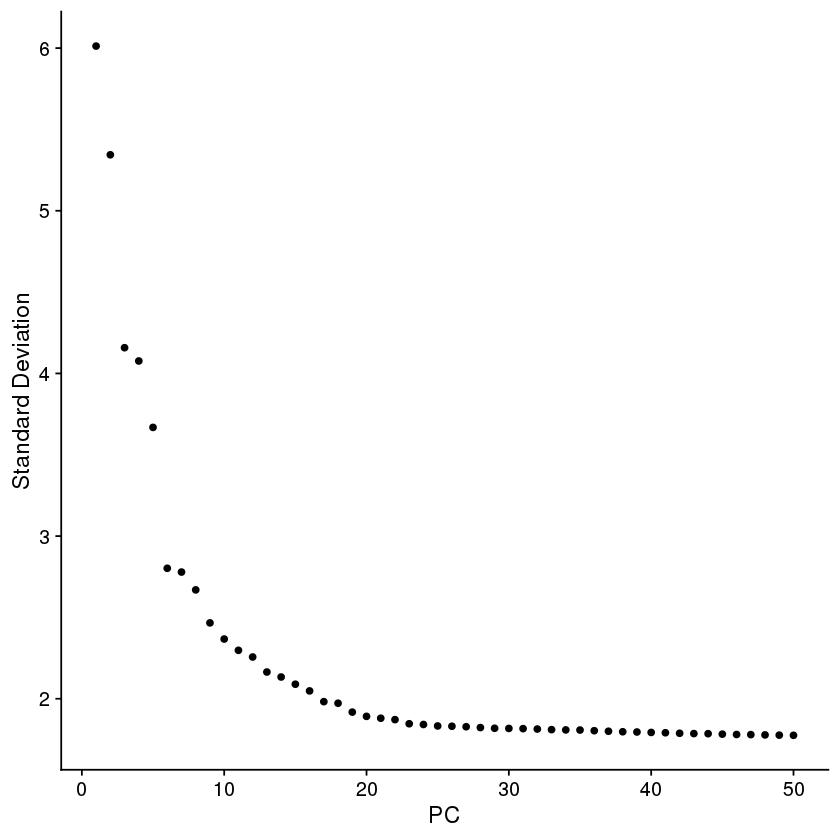

In [7]:
# Dimensional Reduction
dataobj <- RunPCA(dataobj, features = VariableFeatures(object = dataobj),npcs=50)
# Determine the ‘dimensionality’ of the dataset according to elbow plot
pdf(paste0(datasetName,"seurat.elbowplot.pdf"))
ElbowPlot(dataobj,ndim=50) 
dev.off()
ElbowPlot(dataobj,ndim=50) 

In [8]:
pcDim = 30 # set as 75 in this case 

# Cluster the cells
dataobj <- FindNeighbors(dataobj, reduction = "pca", dims = 1:pcDim, nn.eps = 0.5)

Computing nearest neighbor graph

Computing SNN



In [15]:
dataobj <- FindClusters(dataobj, resolution = 0.6, n.start = 5)
randIndex(dataobj$cell_cluster,dataobj$seurat_clusters)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4198
Number of edges: 186398

Running Louvain algorithm...
Maximum modularity in 5 random starts: 0.8360
Number of communities: 14
Elapsed time: 0 seconds


ARI 
0.3032406

In [16]:
rr <- RunUMAP(dataobj,dims=1:pcDim)

10:58:49 UMAP embedding parameters a = 0.9922 b = 1.112

10:58:49 Read 4198 rows and found 30 numeric columns

10:58:49 Using Annoy for neighbor search, n_neighbors = 30

10:58:49 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

10:58:51 Writing NN index file to temp file /tmp/Rtmpy94D6Q/fileca06b7d0ed2

10:58:51 Searching Annoy index using 1 thread, search_k = 3000

10:58:53 Annoy recall = 100%

10:58:53 Commencing smooth kNN distance calibration using 1 thread

10:58:54 Initializing from normalized Laplacian + noise

10:58:55 Commencing optimization for 500 epochs, with 185362 positive edges

10:59:19 Optimization finished



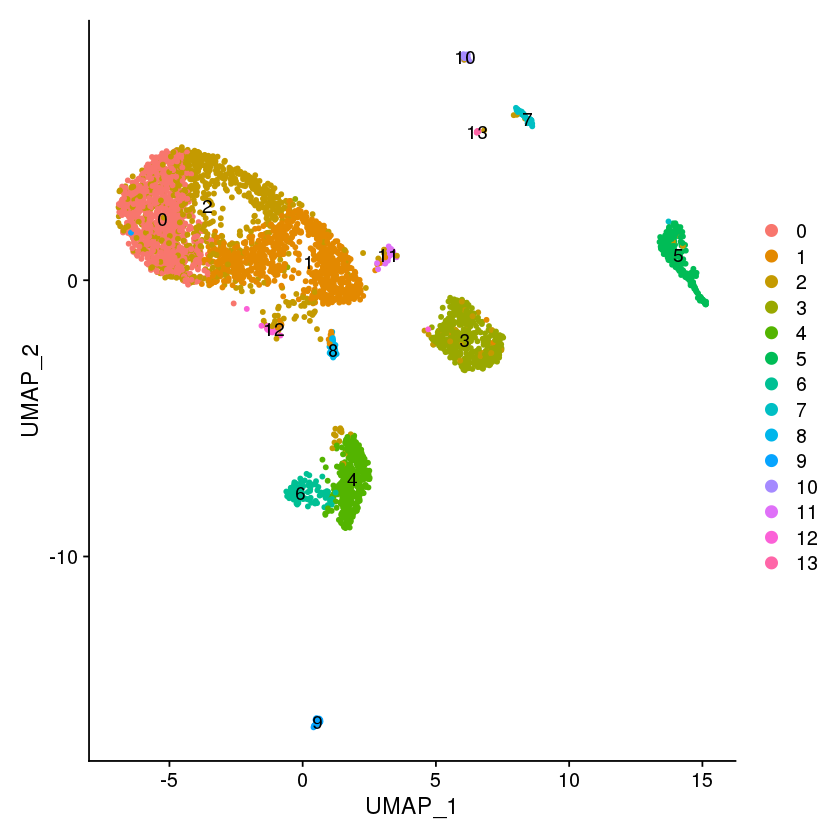

In [17]:
p_umap=DimPlot(rr,label = TRUE, pt.size=1)
ggsave(paste0(datasetName,".seurat.umap.tiff"), plot = p_umap, width = 8, height = 5)
p_umap

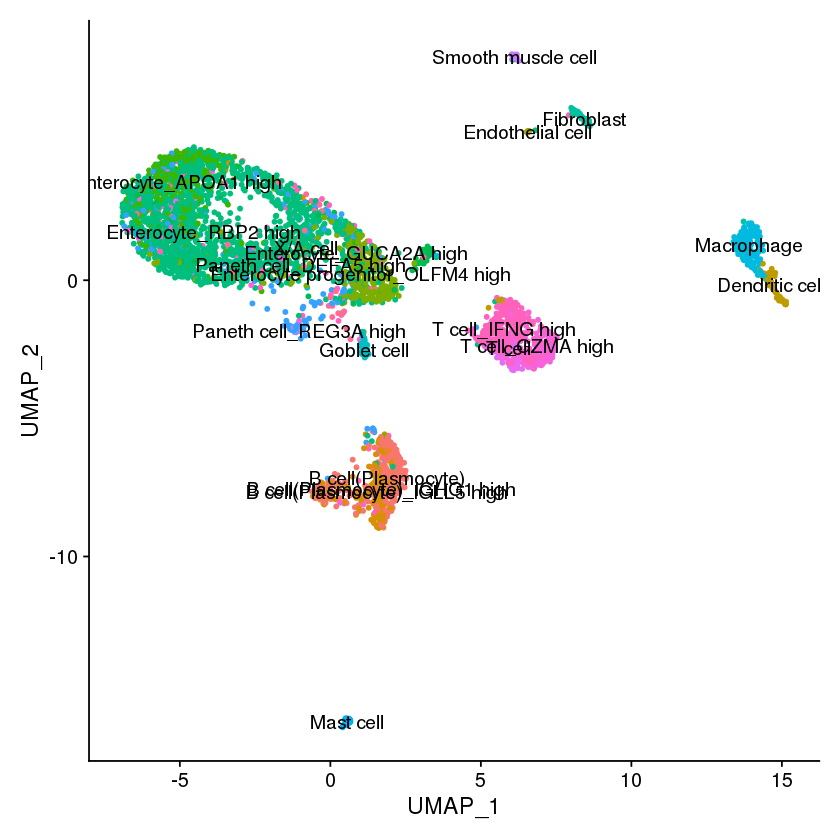

In [18]:
p_umap2 <- DimPlot(rr, reduction = "umap", label = T, group.by = "cell_cluster", pt.size=1)+NoLegend()
ggsave(paste0(datasetName,".seurat.umap_orig.tiff"), plot = p_umap2, width = 8, height = 5)
p_umap2

In [34]:
new.cluster.ids <- c("Jejunum-Epithelial tissue-Enterocytes-APOA1", 
                     "Jejunum-Epithelial tissue-Enterocytes-DMBT1", 
                     "Jejunum-Epithelial tissue-Enterocytes-APOA1", 
                      "Jejunum-Connective tissue-T cell-TRAC", 
                     "Jejunum-Connective tissue-B cell-JCHAIN", 
                     "Jejunum-Connective tissue-Macrophage-C1QA",
                      "Jejunum-Connective tissue-B cell-JCHAIN", 
                     "Jejunum-Connective tissue-Fibroblast-LUM",
                      "Jejunum-Epithelial tissue-Goblet cell-AGR2", 
                     "Jejunum-Connective tissue-Mast cell-CPA3",
                      "Jejunum-Muscle tissue-Smooth muscle cell-MYL9",
                     "Jejunum-Epithelial tissue-Enterocytes-BEST4",
                     "Jejunum-Epithelial tissue-Paneth cell-LYZ",
                     "Jejunum-Epithelial tissue-Endothelial cell-SPARCL1")

In [33]:
subset(dataobj.markers,cluster=='13')
# subset(dataobj.markers,gene=='LYVE1')

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
PECAM1,5.019404e-124,0.7816343,0.786,0.013,3.944248e-120,13,PECAM1
FABP51,2.705971e-122,1.3491014,0.857,0.016,2.126352e-118,13,FABP5
CD320,1.056571e-120,1.0112088,0.786,0.013,8.302536e-117,13,CD320
EHD4,1.983984e-114,0.6453726,0.714,0.011,1.559014e-110,13,EHD4
SPARCL12,1.916891e-101,1.2333681,0.929,0.023,1.506293e-97,13,SPARCL1
TGFBR2,1.241363e-92,0.9015811,0.714,0.015,9.754630e-89,13,TGFBR2
IGFBP41,3.042364e-91,0.8136189,0.643,0.012,2.390690e-87,13,IGFBP4
IGFBP72,2.515737e-75,1.6770724,0.929,0.033,1.976866e-71,13,IGFBP7
APOLD1,1.288941e-71,0.6097612,0.500,0.009,1.012850e-67,13,APOLD1


In [35]:
names(x = new.cluster.ids) <- levels(x = dataobj)
annodataobj <- RenameIdents(object = dataobj, new.cluster.ids)

In [36]:
rr2 <- RunUMAP(annodataobj,dims=1:pcDim)

11:34:27 UMAP embedding parameters a = 0.9922 b = 1.112

11:34:27 Read 4198 rows and found 30 numeric columns

11:34:27 Using Annoy for neighbor search, n_neighbors = 30

11:34:27 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

11:34:31 Writing NN index file to temp file /tmp/Rtmpy94D6Q/fileca07609691c

11:34:31 Searching Annoy index using 1 thread, search_k = 3000

11:34:34 Annoy recall = 100%

11:34:35 Commencing smooth kNN distance calibration using 1 thread

11:34:36 Initializing from normalized Laplacian + noise

11:34:36 Commencing optimization for 500 epochs, with 185362 positive edges

11:35:13 Optimization finished



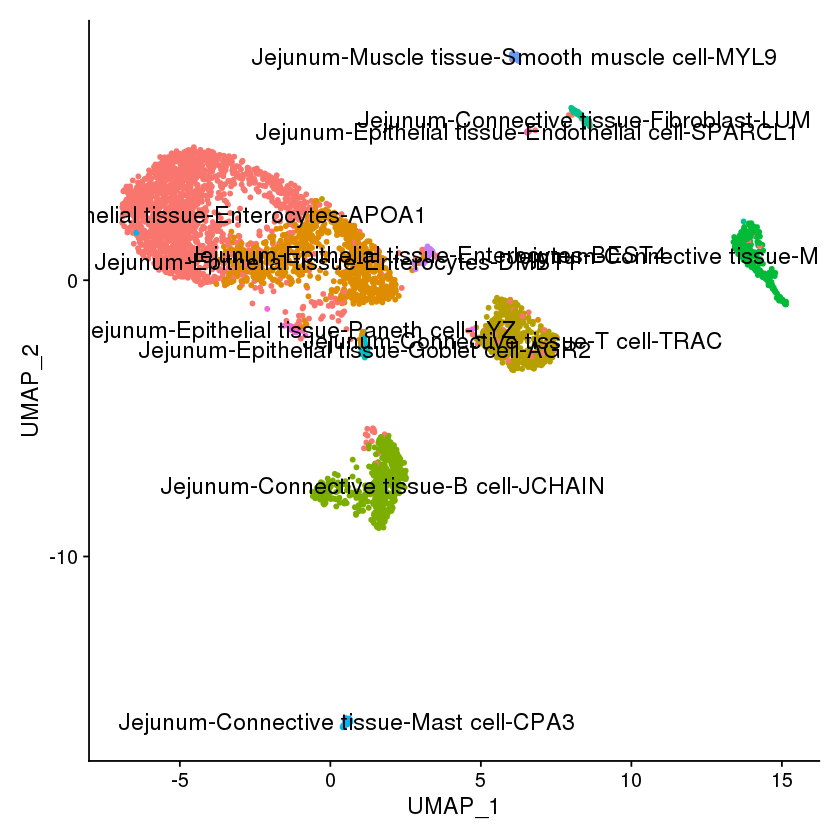

In [37]:
p_umap4 <- UMAPPlot(rr2,label = T, pt.size=1,label.size=5)+NoLegend()
# LabelClusters(plot = p_umap4, id = 'ident', color = 'white')
ggsave(paste0(datasetName,".seurat.umap_hcad.tiff"), plot = p_umap4, width = 25, height = 15)
p_umap4

In [19]:
dataobj.markers <- FindAllMarkers(dataobj, only.pos = TRUE)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13



In [38]:

write.table(dataobj.markers, file = paste0(datasetName,".seurat.markers.txt"), sep = "\t", quote = F, row.names = F, col.names = T)
# 
dataobj<-AddMetaData(dataobj, metadata =as.character(annodataobj@active.ident),col.name='hcad.label') 

write.table(cbind(colnames(dataobj), dataobj$hcad.label), file = paste0(datasetName,"_annotation.hcad.tsv"), sep = "\t", quote = F, row.names = F, col.names = c('cell_ID','cell_cluster'))

saveRDS(dataobj, file = paste0(datasetName,".seuratobj.rds"))